<a href="https://colab.research.google.com/github/ftrnailahhh/Pemrosesan-Bahasa-Alami/blob/main/NLPApp_190411100097_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fitri Na'ilah Anwar** 

# **190411100097**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [2]:
data_movie = pd.read_excel('IMDB Dataset.xlsx')

# Keeping only the neccessary columns
data_movie = data_movie[['review','sentiment']]
data_movie.head()

,review,sentiment
0,"Prussic gas, a murderer donning a red clansman...",positive
1,I was very lucky to see this film as part of t...,positive
2,This movie is really bad. Most of it looks lik...,negative
3,I think this is one hell of a movie..............,positive
4,"I saw this movie in the theater, and was thoro...",positive


In [3]:
# Splitting the dataset into train and test set
train, test = train_test_split(data_movie,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

Positive words


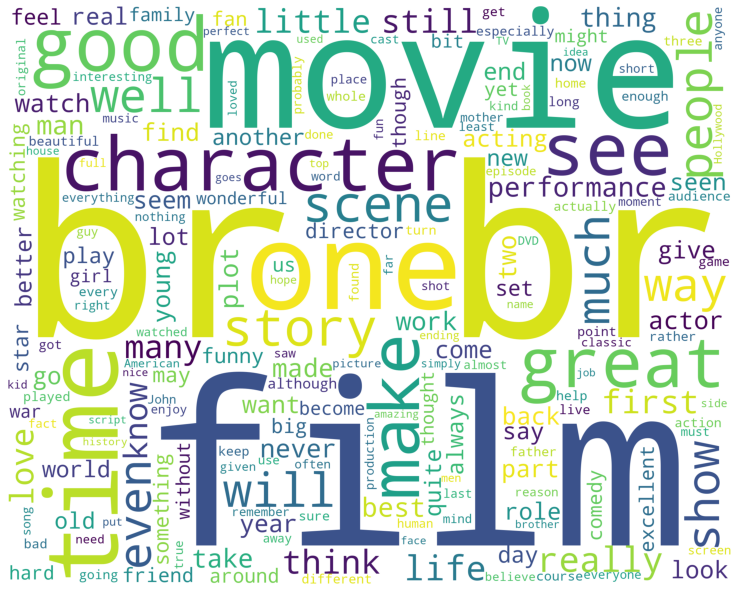

Negative words


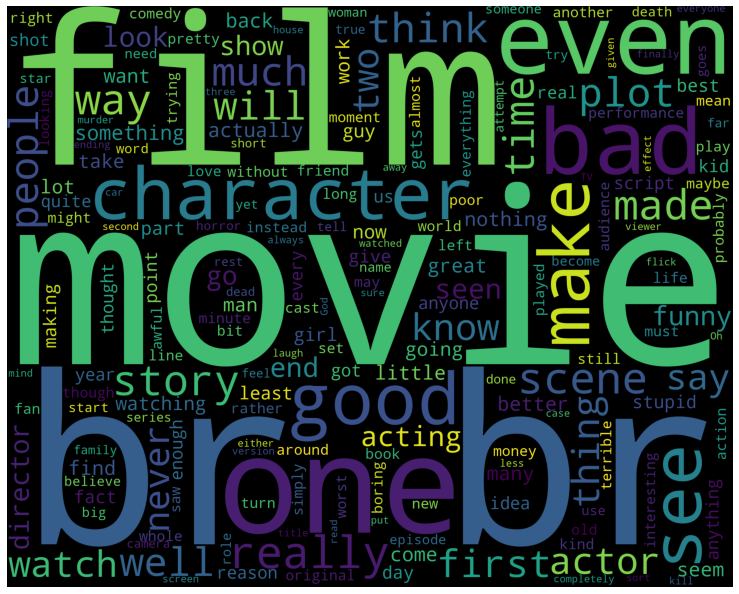

In [5]:
trainPositif = train[ train['sentiment'] == 'positive']
trainPositif = trainPositif['review']
trainNegatif = train[ train['sentiment'] == 'negative']
trainNegatif = trainNegatif['review']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleanedWords = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleanedWords)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(trainPositif,'white')
print("Negative words")
wordcloud_draw(trainNegatif)

In [8]:
reviewes = []
stopwordsWords = set(stopwords.words("english"))

for index, row in train.iterrows():
    filteredWords = [e.lower() for e in row.review.split() if len(e) >= 3]
    cleanedWords = [word for word in filteredWords
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in cleanedWords if not word in stopwordsWords]
    reviewes.append((cleanedWords,row.sentiment))

testPositif = test[ test['sentiment'] == 'positive']
testPositif = testPositif['review']
testNegatif = test[ test['sentiment'] == 'negative']
testNegatif = testNegatif['review']

In [9]:
# Extracting word features
def get_words_in_reviewes(reviewes):
    all = []
    for (words, sentiment) in reviewes:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_reviewes(reviewes))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

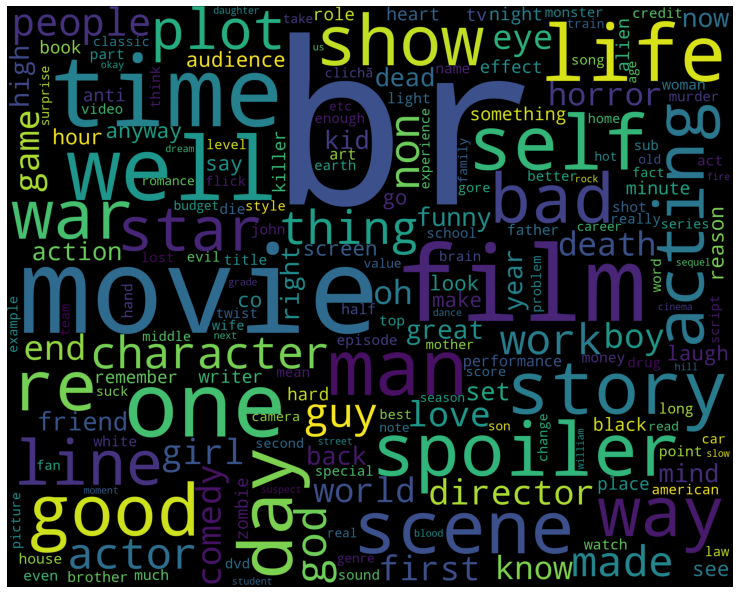

In [10]:
wordcloud_draw(w_features)

In [12]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,reviewes)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [13]:
neg_cnt = 0
pos_cnt = 0
for obj in testNegatif: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'negative'): 
        neg_cnt = neg_cnt + 1
for obj in testPositif: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(testNegatif),neg_cnt))        
print('[Positive]: %s/%s '  % (len(testPositif),pos_cnt)) 

[Negative]: 42/38 
[Positive]: 58/37 


# **Kesimpulan**
Topik Pilihan : Sentimen Analysis
Dataset : 
Dataset IMDB merupakan data berdasarkan review film maupun acara TV teratas. Dengan dilakukan pengklasifikasian menggunakan metode Naive Bayes yang memiliki 2 label yaitu Negative dan Positive. 
Dengan hasil berdasarkan data uji yaitu :
- Pada label Negatif, terdapat 38 data uji yang tepat dilabeli Negatif, dari jumlah data uji sejumlah 42

- Pada label Positif, terdapat 37 data uji yang tepat dilabeli Positif, dari jumlah data uji sejumlah 58